# ハフ変換による円検出
## 目的
このチュートリアルでは
* ハフ変換による円検出の方法を学ぶ．
* 以下の関数の使い方を学ぶ: [cv2.HoughCircles()](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/feature_detection.html?highlight=cv2.houghlinesp#houghcircles)

## 理論
円を表す式は $(x-x_{center})^2 + (y - y_{center})^2 = r^2$ である．ここで $(x_{center},y_{center})$ は円の中心，$ r$ は円の半径を表す．円を表すためにはこの三つのパラメータを使うので次元積算機が必要になるが，これは効率が悪い．そこでOpenCVはエッジの勾配を使う巧妙な方法 __Hough Gradient Method__ を用いている．

ここで円検出に使う関数は [cv2.HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) ](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/feature_detection.html?highlight=cv2.houghlinesp#houghcircles)である．大量の引数があるが，ドキュメントに詳しく説明されているので，早速コードを見てみることにしよう([使用する画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_houghcircles/opencv_logo.jpg))．

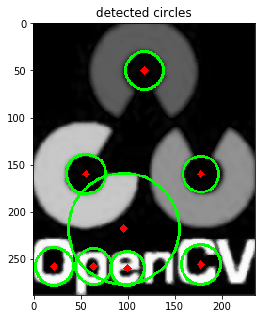

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv_logo.png',0)
img = cv2.medianBlur(img,5)

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(255,0,0),3)

plt.figure(figsize=(12,5))
plt.imshow(cimg), plt.title('detected circles')
plt.show()


## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVを使った画像処理
OpenCVが提供する様々な画像処理の関数について学ぶ
* 前の学習項目: [ハフ変換による直線検出 houghLines.ipynb ]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/houghLines.html)<BR>
画像中の線の検出方法を学ぶ．
* 次の学習項目: [Watershedアルゴリズムを使った画像の領域分割 watershed.ipynb]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/watershed.html)<BR>
Watershed algorithmによる画像の領域分割について学ぶ